# Happy Customers
### Author: Hardik Prajapati (hp.6318@gmail.com)

A fastest growing startup in the logistics and delivery domain is working with several partners and make on-demand delivery to customers. Their goal is to predict what makes their customers happy or unhappy, followed by which they can then take necessary actions.

A survey was recently conducted to a select customer cohort of which we are presented with a subset of this data.

#### Data Description:
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

#### Goal(s):
Predict if a customer is happy or not based on the answers they give to questions asked.

#### Success Metrics:
Reach 73% accuracy score or above


## Importing Necessary modules

In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

## Read the input data file

In [10]:
df = pd.read_csv('./data/ACME-HappinessSurvey2020.csv',delimiter=',')
print("Total instances: {}, Total Features: {}".format(df.shape[0],df.shape[1]-1))
print("Class 0 len: {}, Class 1 len: {}".format(df.shape[0]-sum(df['Y']),sum(df['Y'])))

Total instances: 126, Total Features: 6
Class 0 len: 57, Class 1 len: 69


In [13]:
print(df.head())
df.info()

   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


## Separate the features and labels

In [20]:
XTrain = df[['X1','X2','X3','X4','X5','X6']]
yTrain = df[['Y']]

## Scatter plots

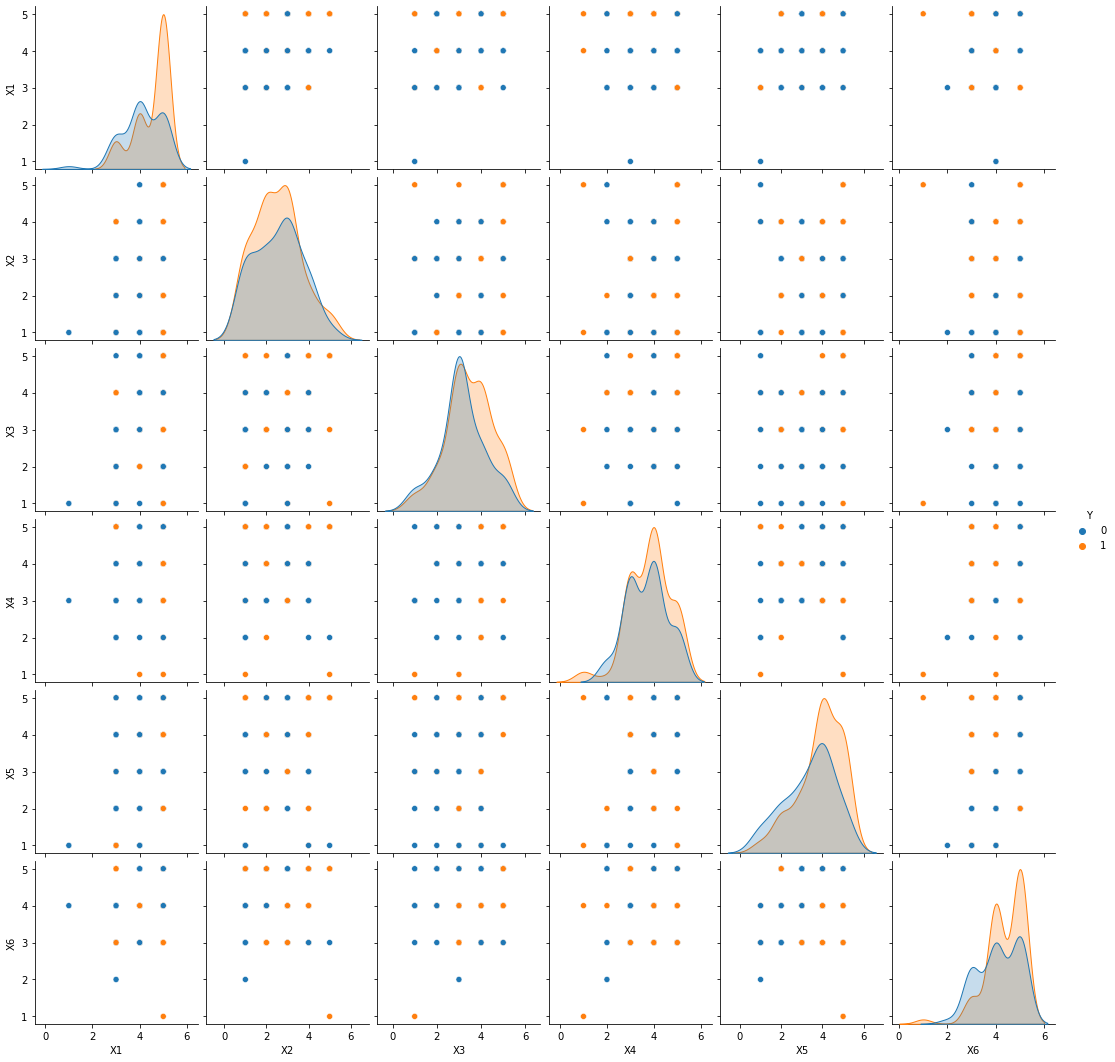

In [11]:
sns.pairplot(data=df, hue="Y")

From the above pair plots, one can observe the diagonal plots which show distribution of individual feature wrt the class. One can easily make up that 'X1' and 'X3' feature show different peaks and are distinct among the classes. 

## Feature distribution


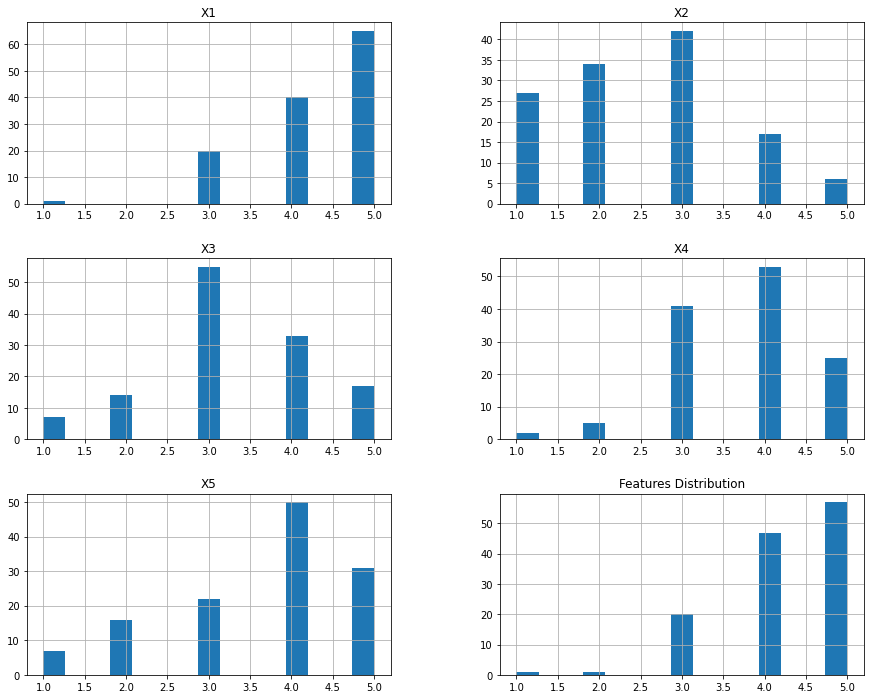

In [21]:
XTrain.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

From the above distribution plots, we can notice that 'X2' and 'X5' features have high variance. 

## Stratified K fold split

In [23]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

## Funtion to run a classifier and process the metrics

In [37]:
def experiment(clf,X,y,skf_obj,clf_name):
    best_acc=-1
    cm = None
    clf_best = None 
    for train_index, test_index in skf_obj.split(X, y):
        x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        clf.fit(x_train_fold, y_train_fold)
        acc = clf.score(x_test_fold, y_test_fold)
        if acc>best_acc:
            clf_best = clf
            best_acc = acc
            predictions = clf.predict(x_test_fold)
            cm = confusion_matrix(y_test_fold, predictions, labels=clf.classes_)
    
    print("Best model accuracy | {} : {} ".format(clf_name, best_acc*100))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_best.classes_)
    disp.plot()
    plt.show()
    return clf_best

## Hypothesis Set: 

   #### 1. Logistic Regression Classifier: This would be the baseline model as it's a very good starting point for a simple classifier
    
   #### 2. Support Vector Machines: This classifier tries to maximize the boundary across the predictor between both classes. This might work because dataset is small with lower feature dimension.
    
   #### 3. Random Forest Classifer: This is an ensemble ML model which predicts the average of many random tree classifiers. This involves the concept of bagging and is expected to outperform the rest. 

## Logistic Regression

Best model accuracy | Logistic Regression Classifier : 75.0 


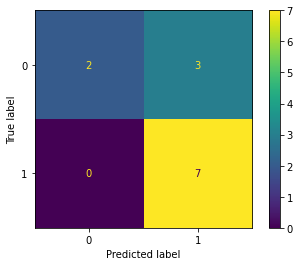

In [38]:
model_LogReg = LogisticRegression(penalty='l1',solver='liblinear')
model_LogReg=experiment(model_LogReg,XTrain,yTrain,skf,'Logistic Regression Classifier')

## Support Vector Classifier

Best model accuracy | Support Vector Machine Classifier : 100.0 


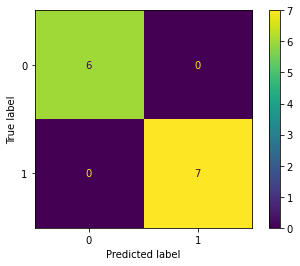

In [39]:
model_svClf = LinearSVC(max_iter=1000, tol=1e-3)
model_svClf = experiment(model_svClf,XTrain,yTrain,skf,'Support Vector Machine Classifier')

## RandomForest CLASSIFIER

Best model accuracy | Random Forest Classifier : 91.66666666666666 


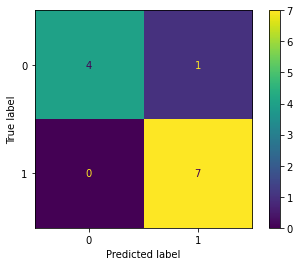

In [40]:
model_randomForest = RandomForestClassifier(n_estimators=50)
model_randomForest = experiment(model_randomForest,XTrain,yTrain,skf,'Random Forest Classifier')

## Observations & Conclusions: 
To begin with, dataset is very small and it's difficult to make a decision on which model performed the best. However, we can get a fair idea that SVM and RandomForest classifier certainly shows sign of better performance than our baseline model. Here, the accuracy and confusion matrix is reported on the kth Stratified fold of training data where it performed the best. From the EDA performed earlier, it seems like feature 'X1', 'X3' are the most important feartures as they had distinctive peak points in distibutions across the both classes.  